Q1

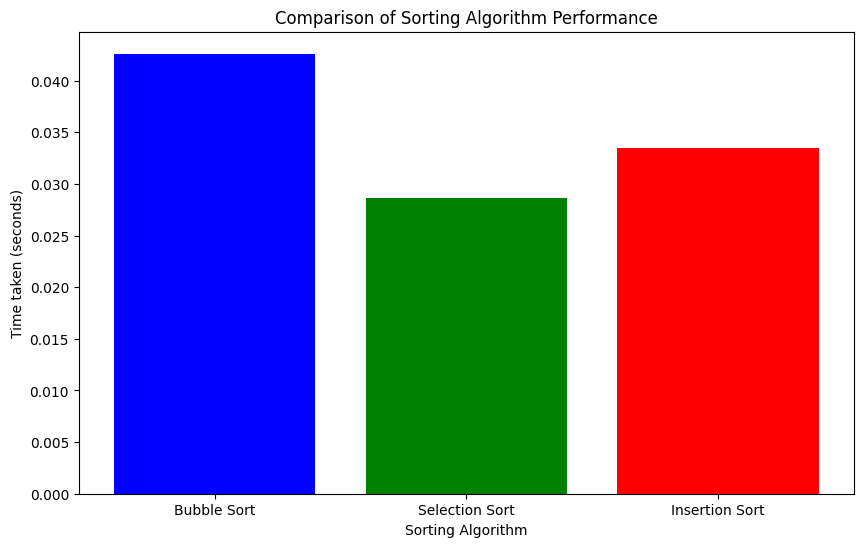

In [1]:
import time
import random
import matplotlib.pyplot as plt

# Generate 1000 random integers between 1 and 10000
random_numbers = [random.randint(1, 10000) for _ in range(1000)]

# Sorting algorithms
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[min_idx] > arr[j]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >=0 and key < arr[j] :
                arr[j + 1] = arr[j]
                j -= 1
        arr[j + 1] = key

# Measure sorting time
def measure_sort_time(sort_function, arr):
    start_time = time.time()
    sort_function(arr)
    end_time = time.time()
    return end_time - start_time

# Duplicate the original array for each sort to ensure fairness
bubble_numbers = random_numbers.copy()
selection_numbers = random_numbers.copy()
insertion_numbers = random_numbers.copy()

# Measure sorting times
bubble_time = measure_sort_time(bubble_sort, bubble_numbers)
selection_time = measure_sort_time(selection_sort, selection_numbers)
insertion_time = measure_sort_time(insertion_sort, insertion_numbers)

# Plotting the results
sort_methods = ['Bubble Sort', 'Selection Sort', 'Insertion Sort']
times = [bubble_time, selection_time, insertion_time]

plt.figure(figsize=(10, 6))
plt.bar(sort_methods, times, color=['blue', 'green', 'red'])
plt.xlabel('Sorting Algorithm')
plt.ylabel('Time taken (seconds)')
plt.title('Comparison of Sorting Algorithm Performance')
plt.show()


Q2

In [2]:
import heapq

def merge_sorted_lists(sorted_lists):
    # Initialize an empty result list
    result = []

    # Initialize a min-heap to keep track of the smallest element from each list
    heap = []

    # Initialize the heap with the first element from each sorted list
    for i, lst in enumerate(sorted_lists):
        if lst:  # Ensure the list is not empty
            heapq.heappush(heap, (lst[0], i, 0))  # (value, list_index, element_index)

    # Iterate until the heap is empty
    while heap:
        # Pop the smallest element from the heap
        value, list_index, element_index = heapq.heappop(heap)

        # Append the smallest element to the result list
        result.append(value)

        # Move to the next element in the list from which the smallest element was taken
        element_index += 1

        # If there are more elements in the same list, push the next element to the heap
        if element_index < len(sorted_lists[list_index]):
            heapq.heappush(heap, (sorted_lists[list_index][element_index], list_index, element_index))

    return result

sorted_lists = [
    [10, 20, 30, 40],
    [15, 25, 35],
    [27, 29, 37, 48, 93],
    [32, 33]
]

# Merge the sorted lists
result = merge_sorted_lists(sorted_lists)

# Print the sorted result
print(result)

[10, 15, 20, 25, 27, 29, 30, 32, 33, 35, 37, 40, 48, 93]


Q3

In [3]:
import heapq

def find_k_largest(nums, k):
    # Create a min-heap to store the K largest elements
    heap = []

    # Iterate through the array
    for num in nums:
        # If the heap is not yet full, or the current element is larger than the smallest element in the heap
        if len(heap) < k or num > heap[0]:
            # If the heap is already full, pop the smallest element
            if len(heap) == k:
                heapq.heappop(heap)
            # Push the current element to the heap
            heapq.heappush(heap, num)

    # The heap now contains the K largest elements, return them in sorted order
    return sorted(heap, reverse=True)

arr = [3, 1, 7, 5, 9, 2, 8]
K = 3
result = find_k_largest(arr, K)
print("The", K, "largest elements in the array are:", result)

The 3 largest elements in the array are: [9, 8, 7]


Q4

In [4]:
def max_activities(activities):
    # Sort activities based on finishing times
    activities.sort(key=lambda x: x[1])

    # Select the first activity
    selected_activities = [activities[0]]

    # Iterate through the remaining activities
    for i in range(1, len(activities)):
        # If the start time of the current activity is after the finish time of the last selected activity, select it
        if activities[i][0] >= selected_activities[-1][1]:
            selected_activities.append(activities[i])

    return selected_activities

# Input activities
activities = [(1, 4), (3, 5), (0, 6), (5, 7), (3, 8), (5, 9), (6, 10), (8, 11), (8, 12), (2, 13), (12, 14)]

# Find the maximum number of activities
max_activity_list = max_activities(activities)

# Output
print("Maximum number of activities performed by a single person:")
print(max_activity_list)

Maximum number of activities performed by a single person:
[(1, 4), (5, 7), (8, 11), (12, 14)]


Q5

In [5]:
def merge_intervals(intervals):
    # Sort intervals based on start times
    intervals.sort(key=lambda x: x[0])

    merged_intervals = []

    # Initialize start and end with first interval
    start, end = intervals[0]

    for interval in intervals[1:]:
        # Check if current interval overlaps with the previous one
        if interval[0] <= end:
            # Merge the intervals
            end = max(end, interval[1])
        else:
            # Add the merged interval to the result list
            merged_intervals.append((start, end))
            # Update start and end with the current interval
            start, end = interval

    # Add the last merged interval to the result list
    merged_intervals.append((start, end))

    return merged_intervals

intervals = [(1, 4), (2, 5), (7, 8), (6, 9)]

# Merge overlapping intervals
merged_intervals = merge_intervals(intervals)

# Output
print("Merged intervals after merging overlapping intervals:")
print(merged_intervals)

Merged intervals after merging overlapping intervals:
[(1, 5), (6, 9)]
